In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np
from datetime import datetime
import time
import scipy
from math import e
df_attack_test = pd.read_csv("Dataset/DDosAttack.csv")
df_idle = pd.read_csv("Dataset/IdleSystem.csv")
df_working = pd.read_csv("Dataset/WorkingSystem.csv")
df_attack = pd.read_csv("Dataset/Dos_10k.csv")

In [53]:
# DDoS dataset
df_ddos_g = pd.read_csv("Dataset/DDos Gowri.csv")
df_ddos_m = pd.read_csv("Dataset/DDos Mukesh.csv")
df_ddos_l = pd.read_csv("Dataset/DDos Likhita.csv")
df_ddos_s = pd.read_csv("Dataset/DDos Sumedha.csv")
df_ddos_attack = pd.concat([df_ddos_g,df_ddos_m,df_ddos_l,df_ddos_s])

# Notes: 

In [57]:
# ls = [df_idle , df_idle , df_attack, df_attack, df_idle, df_idle, df_working, df_idle, df_idle, df_working]
df_idle["Attack"] = -1
df_working["Attack"] = -1
df_attack["Attack"] = 1
df_attack = df_attack[df_attack["Remote Address"] == '10.0.2.4'][:3000]
ls = [df_idle, df_working,df_attack,df_working, df_idle, df_attack, df_working]
# ls = [df_attack]
df = pd.concat(ls)
df

,Index,Protocol,Local Address,Remote Address,Local Port,Remote Port,Local Host,Remote Host,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
0,1,TCP,10.0.2.15,41.63.105.0,49699.0,80.0,NaN,https-41-63-105-0.hyd.llnw.net,http,214,"257,800 Bytes","267,860 Bytes",3227.7 KB/Sec,10/25/2022 8:39:11 AM:097,10/25/2022 8:39:43 AM:672,00:32.6,-1
1,2,TCP,10.0.2.15,41.63.105.128,49709.0,80.0,NaN,https-41-63-105-128.hyd.llnw.net,http,36,"32,122 Bytes","33,603 Bytes",667.4 KB/Sec,10/25/2022 8:39:12 AM:160,10/25/2022 8:39:25 AM:176,00:13.0,-1
2,3,TCP,10.0.2.15,41.63.105.128,49698.0,80.0,NaN,https-41-63-105-128.hyd.llnw.net,http,298,"365,003 Bytes","376,964 Bytes",5749.2 KB/Sec,10/25/2022 8:39:12 AM:160,10/25/2022 8:39:38 AM:362,00:26.2,-1
3,4,TCP,10.0.2.15,117.18.232.240,49696.0,80.0,NaN,NaN,http,114,"131,402 Bytes","136,003 Bytes",2069.7 KB/Sec,10/25/2022 8:39:12 AM:176,10/25/2022 8:39:30 AM:012,00:17.8,-1
4,5,TCP,10.0.2.15,41.63.105.128,49694.0,80.0,NaN,https-41-63-105-128.hyd.llnw.net,http,4,"1,461 Bytes","1,662 Bytes",NaN,10/25/2022 8:39:12 AM:176,10/25/2022 8:39:13 AM:332,00:01.2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,804,TCP,10.0.2.15,8.241.161.254,50728.0,80.0,NaN,NaN,http,4,"1,431 Bytes","1,944 Bytes",93.2 KB/Sec,10/25/2022 9:40:49 AM:286,10/25/2022 9:40:50 AM:810,00:01.5,-1
804,805,UDP,10.0.2.15,192.168.0.1,54472.0,53.0,NaN,NaN,domain,4,346 Bytes,538 Bytes,21.1 KB/Sec,10/25/2022 9:40:50 AM:804,10/25/2022 9:40:51 AM:992,00:01.2,-1
805,806,TCP,10.0.2.15,41.63.105.128,50729.0,80.0,NaN,https-41-63-105-128.hyd.llnw.net,http,7,665 Bytes,"1,409 Bytes",14.1 KB/Sec,10/25/2022 9:40:53 AM:461,10/25/2022 9:40:56 AM:848,00:03.4,-1
806,807,TCP,10.0.2.15,41.63.105.0,50730.0,80.0,NaN,https-41-63-105-0.hyd.llnw.net,http,8,665 Bytes,"1,449 Bytes",14.1 KB/Sec,10/25/2022 9:40:53 AM:578,10/25/2022 9:40:56 AM:951,00:03.4,-1


In [58]:
df = df.drop(["Index","Local Host","Remote Host"],axis=1)
# dropping the rows having NaN values
# df = df.dropna(subset=["Data Speed"])
# To reset the indices
df = df.reset_index(drop = True)
df

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
0,TCP,10.0.2.15,41.63.105.0,49699.0,80.0,http,214,"257,800 Bytes","267,860 Bytes",3227.7 KB/Sec,10/25/2022 8:39:11 AM:097,10/25/2022 8:39:43 AM:672,00:32.6,-1
1,TCP,10.0.2.15,41.63.105.128,49709.0,80.0,http,36,"32,122 Bytes","33,603 Bytes",667.4 KB/Sec,10/25/2022 8:39:12 AM:160,10/25/2022 8:39:25 AM:176,00:13.0,-1
2,TCP,10.0.2.15,41.63.105.128,49698.0,80.0,http,298,"365,003 Bytes","376,964 Bytes",5749.2 KB/Sec,10/25/2022 8:39:12 AM:160,10/25/2022 8:39:38 AM:362,00:26.2,-1
3,TCP,10.0.2.15,117.18.232.240,49696.0,80.0,http,114,"131,402 Bytes","136,003 Bytes",2069.7 KB/Sec,10/25/2022 8:39:12 AM:176,10/25/2022 8:39:30 AM:012,00:17.8,-1
4,TCP,10.0.2.15,41.63.105.128,49694.0,80.0,http,4,"1,461 Bytes","1,662 Bytes",NaN,10/25/2022 8:39:12 AM:176,10/25/2022 8:39:13 AM:332,00:01.2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9553,TCP,10.0.2.15,8.241.161.254,50728.0,80.0,http,4,"1,431 Bytes","1,944 Bytes",93.2 KB/Sec,10/25/2022 9:40:49 AM:286,10/25/2022 9:40:50 AM:810,00:01.5,-1
9554,UDP,10.0.2.15,192.168.0.1,54472.0,53.0,domain,4,346 Bytes,538 Bytes,21.1 KB/Sec,10/25/2022 9:40:50 AM:804,10/25/2022 9:40:51 AM:992,00:01.2,-1
9555,TCP,10.0.2.15,41.63.105.128,50729.0,80.0,http,7,665 Bytes,"1,409 Bytes",14.1 KB/Sec,10/25/2022 9:40:53 AM:461,10/25/2022 9:40:56 AM:848,00:03.4,-1
9556,TCP,10.0.2.15,41.63.105.0,50730.0,80.0,http,8,665 Bytes,"1,449 Bytes",14.1 KB/Sec,10/25/2022 9:40:53 AM:578,10/25/2022 9:40:56 AM:951,00:03.4,-1


In [59]:
df["Throughput"] = 0
df["Duration in seconds"] = 0
type(df["Total Size"][0])
for i in range(0,len(df["Total Size"])):
    df["Total Size"][i] = df["Total Size"][i].translate(str.maketrans('', '', string.punctuation))
    df["Total Size"][i] = int(df["Total Size"][i].split(' ')[0])
    
    df["Data Size"][i] = df["Data Size"][i].translate(str.maketrans('', '', string.punctuation))
    df["Data Size"][i] = int(df["Data Size"][i].split(' ')[0])
    
#     df_s["Data speed"][i] = df_s["Data speed"][i].split(' ')[0]
#     print(i)
    df["Data Speed"][i] = float(str(df["Data Speed"][i]).split(' ')[0])
#     df_s["Data speed"][i] = float(df_s["Data speed"][i])

    t = datetime.strptime(df["Duration"][i].split('.')[0], '%M:%S').time()
    df["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
    
    df["Packets"][i] = df["Packets"][i].translate(str.maketrans('', '', string.punctuation))
    df["Packets"][i] = int(df["Packets"][i].split(' ')[0])
    df["Packets"][i] = int(df["Packets"][i])
    
#     df["Throughput"] - 
    

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A

In [60]:
df["Duration in seconds"].sum(),len(df["Packets"])
# print(df["Duration in seconds"])

(116241, 9558)

In [7]:
# plt.plot(df["Duration in seconds"])

In [8]:
# f = plt.figure()
# f.set_figwidth(20)
# f.set_figheight(9)
# plt.xlabel("S No")
# plt.ylabel("Number of packets")
# plt.plot(df["Packets"])

In [9]:
# plt.plot(df["Data Speed"])

In [10]:
# df

In [61]:
df["Throughput"] = 0.0
for i in range(0,len(df["Total Size"])):
    val = df["Packets"][i]/df["Duration in seconds"][i]
    if val==np.inf or val==-np.inf:
        val = 10**15
    df["Throughput"][i] = val

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in longlong_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
# df

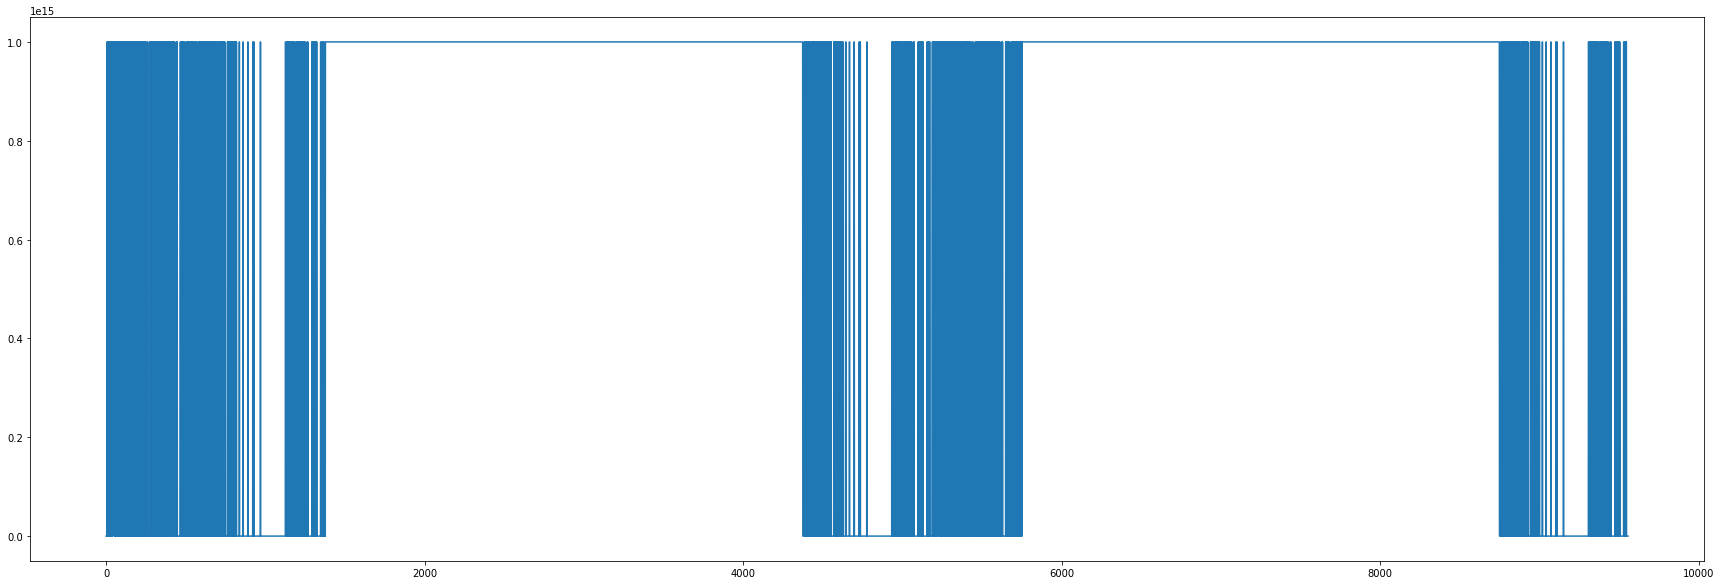

In [62]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(df["Throughput"])

In [63]:
throughput = df["Throughput"]

In [64]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)
throughput

0        6.687500
1        2.769231
2       11.461538
3        6.705882
4        4.000000
          ...    
9553     4.000000
9554     4.000000
9555     2.333333
9556     2.666667
9557     2.666667
Name: Throughput, Length: 9558, dtype: float64

In [74]:
mode = throughput.mode()
stdev = throughput.std()
stdev

444917908585371.06

In [67]:
median = throughput.median()
median

1000000000000000.0

In [68]:
mean = throughput.mean()
mean

728185812931576.9

In [79]:
df["Anomaly"] = -1
df.replace(np.nan,np.inf,inplace=True)
for i in range(0,len(df["Total Size"])):
    if(df["Throughput"][i]>stdev):
#         print(df["Throughput"][i],mean)
        df["Anomaly"][i] = 1        

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


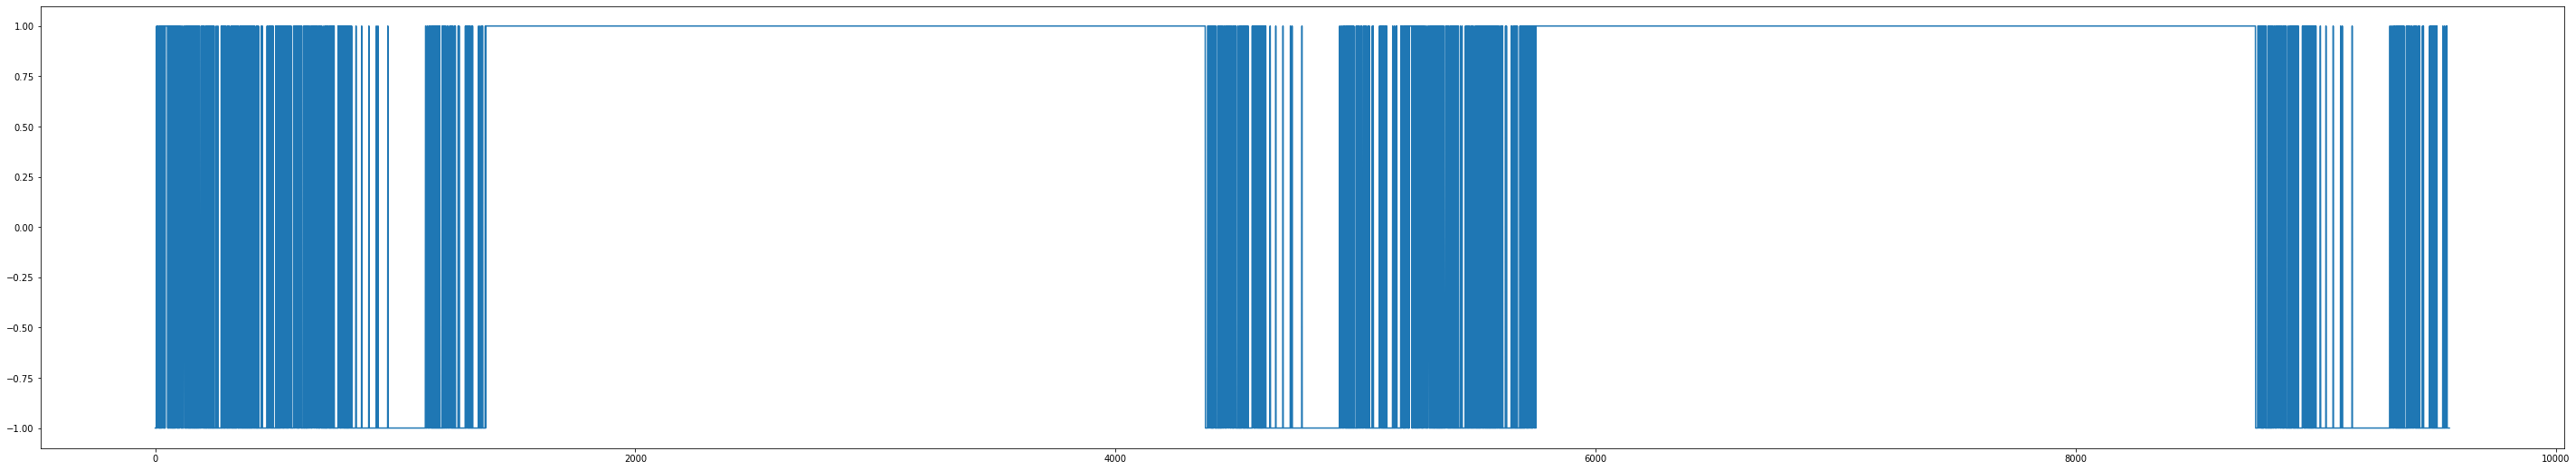

In [80]:
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(9)
plt.plot(df["Anomaly"])

In [81]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
import seaborn as sn
tn, fp, fn, tp = confusion_matrix(df["Attack"], df["Anomaly"]).ravel()
precision = precision_score(df["Attack"], df["Anomaly"])
accuracy = accuracy_score(df["Attack"], df["Anomaly"])
f1_score = f1_score(df["Attack"], df["Anomaly"])

In [82]:
(tn,fp,fn,tp), precision, accuracy, f1_score

((2596, 962, 2, 5998),
 0.8617816091954023,
 0.8991420799330404,
 0.9256172839506174)

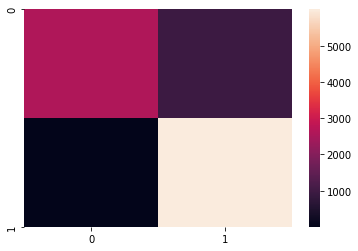

In [22]:
sn.heatmap(confusion_matrix(df["Attack"], df["Anomaly"]))

In [23]:
print(classification_report(df["Attack"], df["Anomaly"]))

              precision    recall  f1-score   support

          -1       1.00      0.73      0.84      3558
           1       0.86      1.00      0.93      6000

    accuracy                           0.90      9558
   macro avg       0.93      0.86      0.88      9558
weighted avg       0.91      0.90      0.90      9558



In [24]:
miss_rate = fn/(fn+tp)
miss_rate

0.0003333333333333333

#  On testing dataset

In [29]:
df_attack_test["Attack"] = 1
df_attack_test = df_attack_test.drop(["Index","Local Host","Remote Host"],axis=1)
# dropping the rows having NaN values
# df = df.dropna(subset=["Data Speed"])
# To reset the indices
df_attack_test = df_attack_test.reset_index(drop = True)

# df_attack_test["Throughput"] = 0
df_attack_test["Duration in seconds"] = 0
type(df_attack_test["Total Size"][0])
for i in range(0,len(df_attack_test["Total Size"])):
    df_attack_test["Total Size"][i] = df_attack_test["Total Size"][i].translate(str.maketrans('', '', string.punctuation))
    df_attack_test["Total Size"][i] = int(df_attack_test["Total Size"][i].split(' ')[0])
    
    df_attack_test["Data Size"][i] = df_attack_test["Data Size"][i].translate(str.maketrans('', '', string.punctuation))
    df_attack_test["Data Size"][i] = int(df_attack_test["Data Size"][i].split(' ')[0])
    
#     df_s["Data speed"][i] = df_s["Data speed"][i].split(' ')[0]
#     print(i)
    df_attack_test["Data Speed"][i] = float(str(df_attack_test["Data Speed"][i]).split(' ')[0])
#     df_s["Data speed"][i] = float(df_s["Data speed"][i])

    t = datetime.strptime(df_attack_test["Duration"][i].split('.')[0], '%M:%S').time()
    df_attack_test["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
    
    df_attack_test["Packets"][i] = df_attack_test["Packets"][i].translate(str.maketrans('', '', string.punctuation))
    df_attack_test["Packets"][i] = int(df_attack_test["Packets"][i].split(' ')[0])
    df_attack_test["Packets"][i] = int(df_attack_test["Packets"][i])


AttributeError: 'int' object has no attribute 'translate'

In [30]:
df_attack_test

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack,Duration in seconds
0,UDP,192.168.0.119,239.255.255.250,53085,1900,ssdp,3,375,612,0.7,10/26/2022 12:36:21 PM:986,10/26/2022 12:36:22 PM:498,00:00.5,1,0
1,UDP,192.168.0.191,10.0.2.15,50554,1,NaN,1,1472,3000,NaN,10/26/2022 12:36:26 PM:762,10/26/2022 12:36:26 PM:762,00:00.0,1,0
2,UDP,192.168.0.191,10.0.2.15,4005,26924,NaN,3199,31990,121600,1,10/26/2022 12:36:26 PM:763,10/26/2022 12:36:57 PM:051,00:30.3,1,0
3,UDP,192.168.0.191,10.0.2.15,50554,2,NaN,2,2944,4500,NaN,10/26/2022 12:36:26 PM:765,10/26/2022 12:36:26 PM:767,00:00.0,1,0
4,UDP,192.168.0.191,10.0.2.15,50554,3,NaN,2,2944,4500,NaN,10/26/2022 12:36:26 PM:768,10/26/2022 12:36:26 PM:769,00:00.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,UDP,192.168.0.191,10.0.2.15,50554,8231,NaN,2,2944,4500,NaN,10/26/2022 12:36:57 PM:049,10/26/2022 12:36:57 PM:049,00:00.0,1,0
3560,UDP,192.168.0.191,10.0.2.15,50554,8232,NaN,2,2944,4500,NaN,10/26/2022 12:36:57 PM:049,10/26/2022 12:36:57 PM:050,00:00.0,1,0
3561,UDP,192.168.0.191,10.0.2.15,50554,8233,NaN,2,2944,4500,NaN,10/26/2022 12:36:57 PM:050,10/26/2022 12:36:57 PM:050,00:00.0,1,0
3562,UDP,192.168.0.191,10.0.2.15,50554,8234,NaN,2,2944,4500,NaN,10/26/2022 12:36:57 PM:051,10/26/2022 12:36:57 PM:051,00:00.0,1,0


In [827]:
# df_attack_test["Throughput"] = 0.0
# size = len(df["Packets"])
# for i in range(0,len(df_attack_test["Total Size"])):
# #     print(i)
#     val = df_attack_test["Packets"][i]/df_attack_test["Duration in seconds"][i]
#     if val==np.inf or val==-np.inf:
#         val = 10**15
#     df_attack_test["Throughput"][i] = val

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in longlong_scalars
  after removing the cwd from sys.path.
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [34]:
df_attack_test["Anomaly"] = -1
df_attack_test["Throughput"] = 0.0
df_attack_test.replace(np.nan,np.inf,inplace=True)
size = len(df["Packets"])
for i in range(0,len(df_attack_test["Total Size"])):
#     df["Throughput"][i] = df_attack_test["Packets"][i]/df_attack_test["Duration in seconds"][i]
#     mean = (mean*size + df["Throughput"][i])/(size + 1)
#     size = size + 1
    if(df_attack_test["Throughput"][i]>mean):
#         print(df["Throughput"][i],mean)
        df_attack_test["Anomaly"][i] = 1 

tn, fp, fn, tp = confusion_matrix(df_attack_test["Attack"], df_attack_test["Anomaly"]).ravel()
precision = precision_score(df_attack_test["Attack"], df_attack_test["Anomaly"])
accuracy = accuracy_score(df_attack_test["Attack"], df_attack_test["Anomaly"])
# f1_score = f1_score(df_attack_test["Attack"], df_attack_test["Anomaly"])
(tn,tp,fn,fp),precision,accuracy

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in longlong_scalars
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


((0, 0, 3564, 0), 0.0, 0.0)

# Entropy

In [41]:
def entropy_calc(data):
    p_data = data.value_counts()           # counts occurrence of each value
    entropy = scipy.stats.entropy(p_data)  # get entropy from counts
    return entropy
df["Entropy throughput"] = 0.0
df["Entropy Remote Address"] = 0.0
df["Entropy Remote Port"] = 0.0
df["Entropy Duration"] = 0.0
for i in range(0,len(df["Total Size"])):
    df["Entropy throughput"][i] = entropy_calc(df["Throughput"][:i+1])
    df["Entropy Remote Address"][i] = entropy_calc(df["Remote Address"][:i+1])
    df["Entropy Remote Port"][i] = entropy_calc(df["Remote Port"][:i+1])
    df["Entropy Duration"][i] = entropy_calc(df["Duration in seconds"][:i+1])
    
df    

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Service Name,Packets,Data Size,Total Size,Data Speed,...,Attack,Throughput,Duration in seconds,Anomaly,Entropy throughput,Entropy Remote Address,Entropy Remote Port,Anomaly entropy based,Anomaly port entropy based,Entropy Duration
0,TCP,10.0.2.15,41.63.105.0,49699.0,80.0,http,214,257800,267860,3227.7,...,-1,inf,32,-1,0.000000,0.000000,0.000000,-1,-1,0.000000
1,TCP,10.0.2.15,41.63.105.128,49709.0,80.0,http,36,32122,33603,667.4,...,-1,inf,13,-1,0.000000,0.693147,0.000000,-1,-1,0.693147
2,TCP,10.0.2.15,41.63.105.128,49698.0,80.0,http,298,365003,376964,5749.2,...,-1,inf,26,-1,0.000000,0.636514,0.000000,-1,-1,1.098612
3,TCP,10.0.2.15,117.18.232.240,49696.0,80.0,http,114,131402,136003,2069.7,...,-1,inf,17,-1,0.000000,1.039721,0.000000,-1,-1,1.386294
4,TCP,10.0.2.15,41.63.105.128,49694.0,80.0,http,4,1461,1662,inf,...,-1,inf,1,-1,0.000000,0.950271,0.000000,-1,-1,1.609438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9553,TCP,10.0.2.15,8.241.161.254,50728.0,80.0,http,4,1431,1944,93.2,...,-1,4.000000,1,-1,1.989461,2.020966,6.090664,-1,-1,1.693638
9554,UDP,10.0.2.15,192.168.0.1,54472.0,53.0,domain,4,346,538,21.1,...,-1,4.000000,1,-1,1.989808,2.020983,6.090254,-1,-1,1.693801
9555,TCP,10.0.2.15,41.63.105.128,50729.0,80.0,http,7,665,1409,14.1,...,-1,2.333333,3,-1,1.990380,2.021206,6.089903,-1,-1,1.694030
9556,TCP,10.0.2.15,41.63.105.0,50730.0,80.0,http,8,665,1449,14.1,...,-1,2.666667,3,-1,1.990752,2.021532,6.089551,-1,-1,1.694258


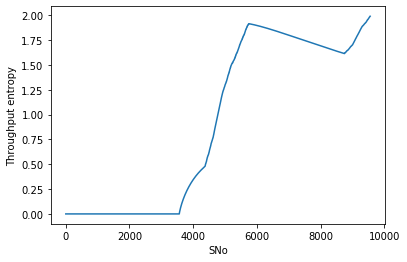

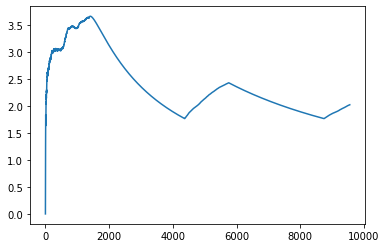

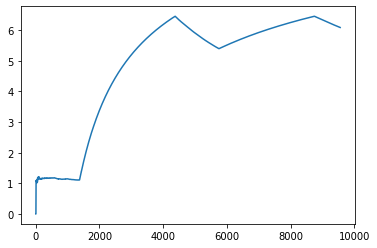

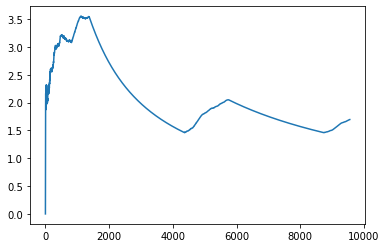

In [47]:
plt.xlabel("SNo")
plt.ylabel("Throughput entropy")
plt.plot(df["Entropy throughput"])
plt.figure()
plt.plot(df["Entropy Remote Address"])
plt.figure()
plt.plot(df["Entropy Remote Port"])
plt.figure()
plt.plot(df["Entropy Duration"])

In [43]:
## Entropy throughput anomaly detection
df["Anomaly entropy based"] = -1
df["Anomaly port entropy based"] = -1
df["Anomaly duration entropy based"] = -1
checkval = df["Entropy throughput"][0]
check_port = df["Entropy Remote Port"][0]
check_duration = df["Entropy Duration"][0]
for i in range(0,len(df["Total Size"])):
    if df["Entropy throughput"][i]<checkval:
        df["Anomaly entropy based"][i] = 1
    if df["Entropy Remote Port"][i]>check_port:
        df["Anomaly port entropy based"][i] = 1
    if df["Entropy Duration"][i]>check_port:
        df["Anomaly duration entropy based"][i] = 1
    check_port = df["Entropy Remote Port"][i]
    checkval = df["Entropy throughput"][i]
    check_duration = df["Entropy Duration"][i]
# df["Entropy throughput"][0],checkval,type(df["Entropy throughput"][0]),type(checkval),df["Entropy throughput"][i]<checkval

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


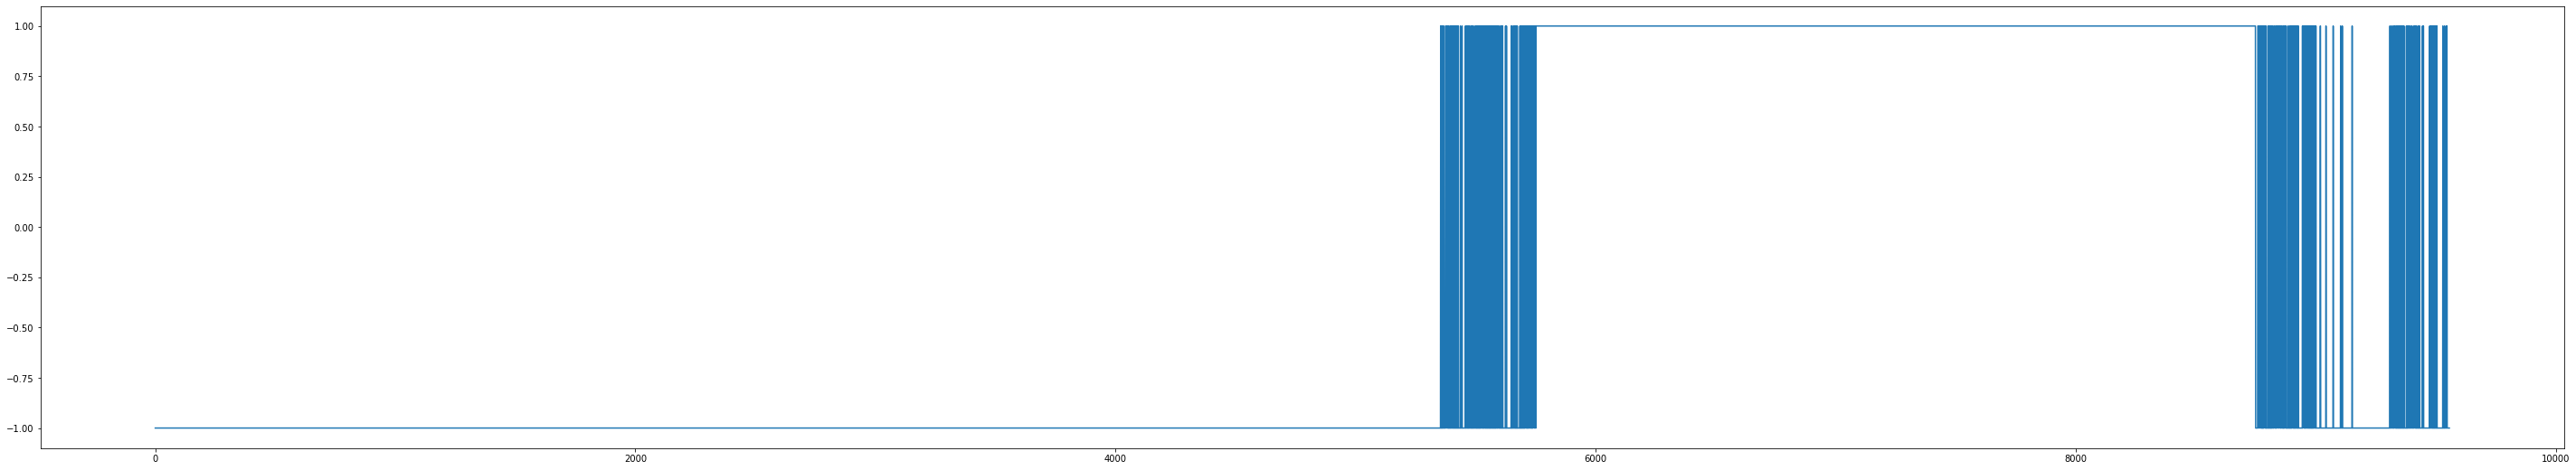

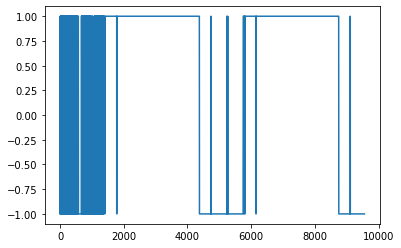

In [38]:
f = plt.figure()
f.set_figwidth(50)
f.set_figheight(9)
plt.plot(df["Anomaly entropy based"])
plt.figure()
plt.plot(df["Anomaly port entropy based"])

In [44]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(df["Attack"], df["Anomaly entropy based"]).ravel()
precision = precision_score(df["Attack"], df["Anomaly entropy based"])
accuracy = accuracy_score(df["Attack"], df["Anomaly entropy based"])
f1_score = f1_score(df["Attack"], df["Anomaly entropy based"])
(tn,fp,fn,tp), precision, accuracy, f1_score

((3247, 311, 3001, 2999),
 0.9060422960725075,
 0.6534839924670434,
 0.6442534908700323)

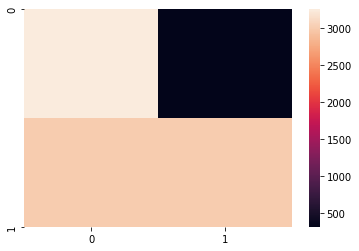

In [48]:
sn.heatmap(confusion_matrix(df["Attack"], df["Anomaly entropy based"]))

In [45]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(df["Attack"], df["Anomaly port entropy based"]).ravel()
precision = precision_score(df["Attack"], df["Anomaly port entropy based"])
accuracy = accuracy_score(df["Attack"], df["Anomaly port entropy based"])
f1_score = f1_score(df["Attack"], df["Anomaly port entropy based"])
(tn,fp,fn,tp), precision, accuracy, f1_score

((3107, 451, 5, 5995),
 0.9300341296928327,
 0.9522912743251726,
 0.9633617226418125)

In [46]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(df["Attack"], df["Anomaly duration entropy based"]).ravel()
precision = precision_score(df["Attack"], df["Anomaly duration entropy based"])
accuracy = accuracy_score(df["Attack"], df["Anomaly duration entropy based"])
f1_score = f1_score(df["Attack"], df["Anomaly duration entropy based"])
(tn,fp,fn,tp), precision, accuracy, f1_score

((2184, 1374, 5545, 455),
 0.24876981957353744,
 0.27610378740322244,
 0.11623451270915824)

# SVM

In [340]:
from sklearn.svm import OneClassSVM
# dfsvm = df[["Local Port","Remote Port","Packets","Data Size","Total Size","Data Speed","Capture Time","Last Packet Time","Duration","Throughput","Duration in seconds"]]
model = OneClassSVM(kernel = 'poly', gamma = 0.001, nu = 0.03).fit(df[["Packets","Data Size","Total Size","Throughput","Duration in seconds"]])

In [341]:
# df[df["Data Speed"]==np.inf]
# type(df["Data Speed"][4])
y_pred = model.predict(df[["Packets","Data Size","Total Size","Throughput","Duration in seconds"]])

In [342]:
tn, fp, fn, tp = confusion_matrix(df["Attack"], y_pred).ravel()
precision = precision_score(df["Attack"], y_pred)
accuracy = accuracy_score(df["Attack"], y_pred)
# f1_score = f1_score(df["Attack"], y_pred)
# y_pred
print((tn,fp,fn,tp), precision, accuracy)
print(classification_report(df["Attack"], y_pred))

(201, 3924, 0, 7128) 0.6449511400651465 0.6512929885363903
              precision    recall  f1-score   support

          -1       1.00      0.05      0.09      4125
           1       0.64      1.00      0.78      7128

    accuracy                           0.65     11253
   macro avg       0.82      0.52      0.44     11253
weighted avg       0.78      0.65      0.53     11253



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
# https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a